In [11]:
#Ejercicio 3
# En este ejercicio deberá implementar la función `calcular` y verificar su correcto funcionamiento
import pandas as pd
import numpy as np

def verificar_resultado(expected, calculated, title):
    # Verifica si {expected} es igual a {calculated} con unna tolerancia de 1e-2 (dos decimales)
    tolerance = 1e-2
    title=title.ljust(35)
    if np.abs(expected-calculated)>tolerance:
        print(f"- {title}: error (esperaba {expected}, obtuve {calculated:.2f})")
    else:
        print(f"+ {title}: bien  (esperaba {expected}, obtuve {calculated:.2f}).")


# Retorna el indice de la lista en base a su key
def get_key(data, key):
    return list(data.keys()).index(key) 

def calcular(dataframe):
    # Arreglo en numpy
    sopas = np.array(dataframe)

    ###### 1) Calcular el valor promedio del atributo GRASA ######
    # Inicialización de datos
    promedio_grasa = 0
    # Obtengo la key de GRASA
    key_de_grasa = get_key(dataframe, 'GRASA')
    # Obtengo el promedio
    promedio_grasa = np.mean(sopas[:,key_de_grasa]) 
        # VERSION SIN NUMPY
        # cant_filas = len(dataframe)
        # for i in range(cant_filas):
        #     suma += sopas[i,key_de_grasa]
        # promedio_grasa = suma/cant_filas



    ######  2) Contar la cantidad sopas del tipo "CC" ######
    # Inicialización de datos
    cant_tipo_cc = 0
    # Obtengo la key de TIPO
    key_de_tipo = get_key(dataframe, 'TIPO')
    # Obtengo el promedio
    cant_tipo_cc = np.count_nonzero(sopas[:,key_de_tipo] == 'CC')



    ######  3) Encontrar la sopa con más sodio (y el valor) ######
    max_sodio = 0
    max_sodio_indice = 0

    key_de_sodio = get_key(dataframe, 'SODIO')
    max_sodio = np.amax(sopas[:,key_de_sodio])

    result = np.where(sopas == np.amax(sopas[:,key_de_sodio]))
    max_sodio_indice = int(result[0])

    ###### FIN COMPLETAR ######

    return promedio_grasa, cant_tipo_cc, max_sodio, max_sodio_indice


dataframe = pd.read_excel('Sopas.xls')

print(dataframe)

dataframe.TIPO=pd.Categorical(dataframe.TIPO)
dataframe.TIPO=dataframe.TIPO.cat.codes

print(dataframe)


# filas,columnas=dataframe.shape
# print(f"El conjunto de datos tiene:\n\t {filas} filas o ejemplos\n\t {columnas} columnas o atributos")
# print("Las columnas son: ", list(dataframe.columns))
# print("\n")

# # print)

# promedio_grasa, cant_tipo_cc, max_sodio, max_sodio_indice = calcular(dataframe)
# print("=== Resultado de los cálculos: ===")
# verificar_resultado(2.4, promedio_grasa, "promedio_grasa")
# verificar_resultado(15, cant_tipo_cc, "cant_tipo_cc")
# verificar_resultado(970, max_sodio, "max_sodio")
# verificar_resultado(6, max_sodio_indice, "max_sodio_indice")


    MARCA PRODUCTO TIPO  COSTO  CALORÍAS  GRASA  CALORÍAS DE GRASA  SODIO
0       1       CN   CC   0.35        60      2                 30    380
1       2       CN   CR   0.66        75      2                 24    630
2       3       CN   CC   0.18        60      2                 30    870
3       4       CN   DI   0.33       170      8                 42    170
4       5       CN   CR   0.77        80      2                 23    460
5       6       CN   DC   0.21        80      2                 23    550
6       7       CN   DC   0.09       190      8                 38    970
7       8       CN   DC   0.11       200      9                 41    960
8       9       CN   DC   0.26       100      2                 18    485
9      10       CN   CC   0.17        60      2                 30    840
10     11       CN   CC   0.19        60      2                 30    840
11     12       CN   DC   0.09       190      9                 43    880
12     13       CN   CC   0.19        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024234099250>,
      dtype=object)

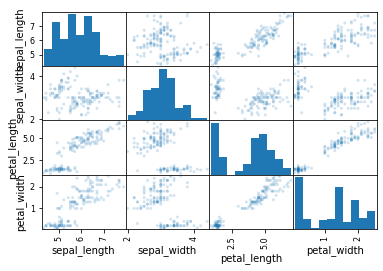

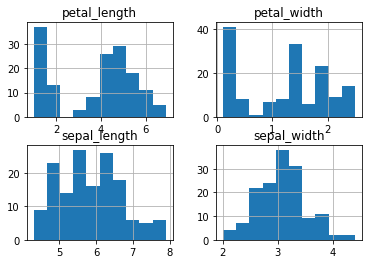

In [2]:
#Ejercicio 4
import numpy as np
import pandas as pd

#Inciso A (Lectura):
df = pd.read_csv('iris.csv')

#Inciso B ('scatter_matrix'):
pd.plotting.scatter_matrix(df, alpha=0.2)

#Inciso C (Histograma):
df.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213213A24C0>,
      dtype=object)

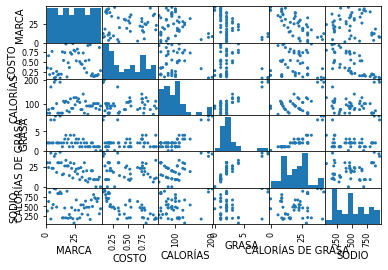

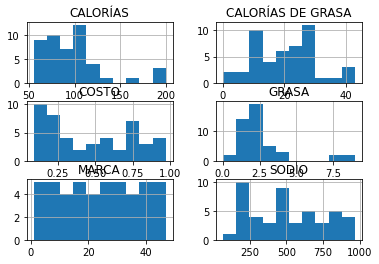

In [17]:
#Ejercicio 5
import numpy as np
import pandas as pd

#Inciso A (Lectura):
df = pd.read_excel('Sopas.xls')

#Inciso B ('scatter_matrix'):
pd.plotting.scatter_matrix(df, alpha=1)

#Inciso C (Histograma):
df.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021320E06760>,
      dtype=object)

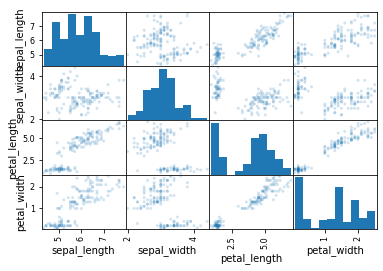

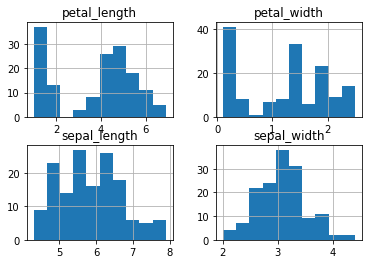

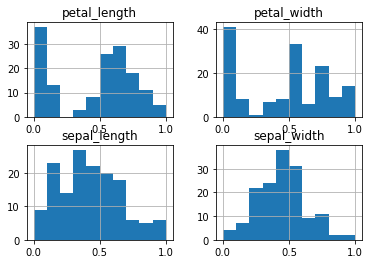

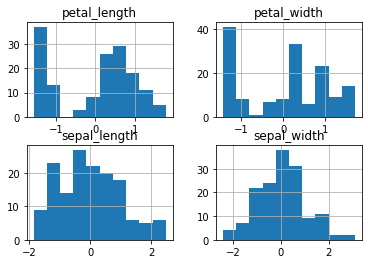

In [42]:
#Ejercicio 6
import numpy as np
import pandas as pd

def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns[0:4]:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

def z_score_scaling(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns[0:4]:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    

#Inciso A (Lectura):
df = pd.read_csv('iris.csv')

#Resultados del Ejercicio 4
pd.plotting.scatter_matrix(df, alpha=0.2)
df.hist()

#Resultados del Ejercicio 6
#Normalización con min max
normalized_df = min_max_scaling(df)
normalized_df.hist()

#Normalización con z-score
normalized_df_2 = z_score_scaling(df)
normalized_df_2.hist()

# Try
# zscore = (iris - iris.mean()) / iris.std()
# min_max = (iris - iris.min()) / (iris.max() - iris.min())

